# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [15]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 

import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt

import matplotlib.pyplot as plt

# Import requests and BytesIO to download and read excel files from the web into pandas.

import requests
from io import BytesIO

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [16]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# add headers so it looks like a browser request

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_5_2) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.6 Safari/605.1.15'
}

# Fetch the file with browser like headers.

response = requests.get(url_LondonHousePrices, headers=headers)

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  

properties = pd.read_excel(BytesIO(response.content), sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [17]:
# use .shape feature to look at the number of rows and columns
properties.shape

(364, 49)

In [18]:
# use .head() method to see the structure of the dataset.
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
2,1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
3,1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
4,1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [19]:
# Transpose the data. Rows are observation, Columns are variables.
properties_T = properties.transpose()

In [20]:
# checking the head of tranposed data
properties_T.head(15)

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,103215,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,52909,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,98936,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,64508,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318
Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,79557,...,563027,565386,575833,583797,593512,594889,573473,569368,557533,569764
Bromley,E09000006,83082,83068,82856,82525,82951,83806,84330,83471,82847,...,492420,497735,501697,507972,506616,511278,509212,512971,515623,520839
Camden,E09000007,119775,118365,119131,118948,118781,120721,122840,124328,119442,...,843334,874621,861971,846638,845114,853615,865265,848937,816740,781183
Croydon,E09000008,70118,69908,69666,69562,69800,70011,70102,69951,70356,...,394297,393405,405166,407200,409581,406122,406564,411749,411440,408259
Ealing,E09000009,85469,86551,87067,87933,87813,87336,88108,88487,87743,...,572195,577138,579103,581727,578103,575312,570470,577373,572921,570931


In [21]:
# checking the indices 
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [22]:
# resetting the indices to numerical values
properties_T = properties_T.reset_index()

In [23]:
# check the dataframes indices
properties_T.index

RangeIndex(start=0, stop=49, step=1)

In [24]:
# check the new structure of the dataframe
prboperties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,354,355,356,357,358,359,360,361,362,363
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318


In [25]:
# use .column feature to confirm our dataframe's columns are integers
properties_T.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           354,     355,     356,     357,     358,     359,     360,     361,
           362,     363],
      dtype='object', length=365)

In [26]:
# row at index 0 contains the proper value for column heading
# use .iloc to see row at index 0. double square bracket [[]] to get the dataframe
properties_T.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,354,355,356,357,358,359,360,361,362,363
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00


In [27]:
# assign row at index 0 as the columns heading
properties_T.columns = properties_T.iloc[0]

In [28]:
# check the the dataframe 
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318


In [29]:
# use .drop() to drop row at index 0
properties_T = properties_T.drop(0)

In [30]:
# check dataframe again 
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,563027,565386,575833,583797,593512,594889,573473,569368,557533,569764


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [35]:
# rename the column Unnamed 0 and NaT

properties_T = properties_T.rename(columns={'Unnamed: 0':'London_Borough', pd.NaT:'ID'})

In [36]:
# check the dataframe
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00
1,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,836988,778044,779211,795056,778662,745121,823237,810573,798307,718463
2,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,335460,333844,331966,336744,346844,351242,353220,351832,362556,370501
3,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,619969,623966,625759,622994,626200,629875,625178,612454,605640,604875
4,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,400200,398779,403632,405404,407520,406255,405368,406561,408568,408318
5,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,563027,565386,575833,583797,593512,594889,573473,569368,557533,569764


In [37]:
# checking the number of columns in the Dataframe. Dataframe has too many columns
properties_T.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2024-06-01 00:00:00, 2024-07-01 00:00:00, 2024-08-01 00:00:00,
       2024-09-01 00:00:00, 2024-10-01 00:00:00, 2024-11-01 00:00:00,
       2024-12-01 00:00:00, 2025-01-01 00:00:00, 2025-02-01 00:00:00,
       2025-03-01 00:00:00],
      dtype='object', name=0, length=365)

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [38]:
# use pd.melt() to melt all hte values along the Dataframe into a single column

clean_properties = pd.melt(properties_T, id_vars=['London_Borough','ID'])

In [39]:
# check the Dataframe structure
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,90347
1,Barking & Dagenham,E09000002,1995-01-01,51870
2,Barnet,E09000003,1995-01-01,98948
3,Bexley,E09000004,1995-01-01,64956
4,Brent,E09000005,1995-01-01,76880


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [40]:
# Renaming the column '0' and 'value'

clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_Price'})

In [41]:
clean_properties.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,90347
1,Barking & Dagenham,E09000002,1995-01-01,51870
2,Barnet,E09000003,1995-01-01,98948
3,Bexley,E09000004,1995-01-01,64956
4,Brent,E09000005,1995-01-01,76880


In [42]:
# Use .dtypes to check the data type of the new Dataframe

clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_Price             object
dtype: object

In [43]:
# Average_Price should be numeric type, specifically, float
# converting Average_Price to float by applying to_numeric()

clean_properties['Average_Price'] = pd.to_numeric(clean_properties['Average_Price'])

In [44]:
# check the new datatype 

clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_Price            float64
dtype: object

In [45]:
# call count() method to check for missing values in the DataFrame

clean_properties.count()

London_Borough    17424
ID                16335
Month             17424
Average_Price     16335
dtype: int64

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [46]:
# cehcking the content of the London_Borough coulumn bu calling .unique() method.
# there should be 32 London Boroughs

clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [61]:
# we have strings that shouldn't belong in the London Borough column
# subsetting all the unnamed London Boroughs by calling str.contains() method to see if they contian any valuablle information

clean_properties[clean_properties['London_Borough'].str.contains('Unnamed')].head(20)


,London_Borough,ID,Month,Average_Price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
94,Unnamed: 47,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
142,Unnamed: 47,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN


In [52]:
# check the number of rows for NAs as their ID values by calling .isna()

clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_Price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
17364,Unnamed: 37,NaN,2025-02-01,NaN
17374,Unnamed: 47,NaN,2025-02-01,NaN
17409,Unnamed: 34,NaN,2025-03-01,NaN
17412,Unnamed: 37,NaN,2025-03-01,NaN


In [54]:
# since there are no valuable information on unnamed Boroughs, we can drop them using .dropna()
# call the new Dataframe NaNFreeDf

NaNFreeDf = clean_properties.dropna()


In [56]:
# check the new Dataframe

NaNFreeDf.head(50)

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,90347.0
1,Barking & Dagenham,E09000002,1995-01-01,51870.0
2,Barnet,E09000003,1995-01-01,98948.0
3,Bexley,E09000004,1995-01-01,64956.0
4,Brent,E09000005,1995-01-01,76880.0
5,Bromley,E09000006,1995-01-01,83082.0
6,Camden,E09000007,1995-01-01,119775.0
7,Croydon,E09000008,1995-01-01,70118.0
8,Ealing,E09000009,1995-01-01,85469.0
9,Enfield,E09000010,1995-01-01,77018.0


In [57]:
# count on the Dataframe 

NaNFreeDf.count()

London_Borough    16335
ID                16335
Month             16335
Average_Price     16335
dtype: int64

In [59]:
# compare the shape of clean_properties and NaNFreeDf

print(clean_properties.shape)
print(NaNFreeDf.shape)


(17424, 4)
(16335, 4)


In [62]:
# DataFrame still contains invalid boroughs 
# make a list of non-borough value

nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [63]:
# call .isin() method to filter the non-borough value in the Dataframe

NaNFreeDf[NaNFreeDf['London_Borough'].isin(nonBoroughs)]

,London_Borough,ID,Month,Average_Price
34,Inner London,E13000001,1995-01-01,85892.0
35,Outer London,E13000002,1995-01-01,76196.0
37,NORTH EAST,E12000001,1995-01-01,39809.0
38,NORTH WEST,E12000002,1995-01-01,40907.0
39,YORKS & THE HUMBER,E12000003,1995-01-01,42171.0
...,...,...,...,...
17418,EAST OF ENGLAND,E12000006,2025-03-01,343876.0
17419,LONDON,E12000007,2025-03-01,552073.0
17420,SOUTH EAST,E12000008,2025-03-01,386316.0
17421,SOUTH WEST,E12000009,2025-03-01,310837.0


In [93]:
# now use the negation operator ~ , in combination with .isin() method we w remove the non-borough value

NaNFreeDf = NaNFreeDf[~NaNFreeDf['London_Borough'].isin(nonBoroughs)]

In [94]:
# we will call our clean, NaN free, and non-borough free Dataframe df

df = NaNFreeDf

In [95]:
df.head()

,London_Borough,ID,Month,Average_Price,Year
0,City of London,E09000001,1995-01-01,90347.0,1995
1,Barking & Dagenham,E09000002,1995-01-01,51870.0,1995
2,Barnet,E09000003,1995-01-01,98948.0,1995
3,Bexley,E09000004,1995-01-01,64956.0,1995
4,Brent,E09000005,1995-01-01,76880.0,1995


In [96]:
df.tail()

,London_Borough,ID,Month,Average_Price,Year
17404,Sutton,E09000029,2025-03-01,436424.0,2025
17405,Tower Hamlets,E09000030,2025-03-01,497367.0,2025
17406,Waltham Forest,E09000031,2025-03-01,522282.0,2025
17407,Wandsworth,E09000032,2025-03-01,704342.0,2025
17408,Westminster,E09000033,2025-03-01,904356.0,2025


**2.6. Visualizing the data** 

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [97]:
# filtering the City of London borough and calling it City_of_London_prices

City_of_London_prices = df[df['London_Borough']=='City of London']
City_of_London_prices.head()


,London_Borough,ID,Month,Average_Price,Year
0,City of London,E09000001,1995-01-01,90347.0,1995
48,City of London,E09000001,1995-02-01,81213.0,1995
96,City of London,E09000001,1995-03-01,78168.0,1995
144,City of London,E09000001,1995-04-01,76172.0,1995
192,City of London,E09000001,1995-05-01,83392.0,1995


Text(0, 0.5, 'Price')

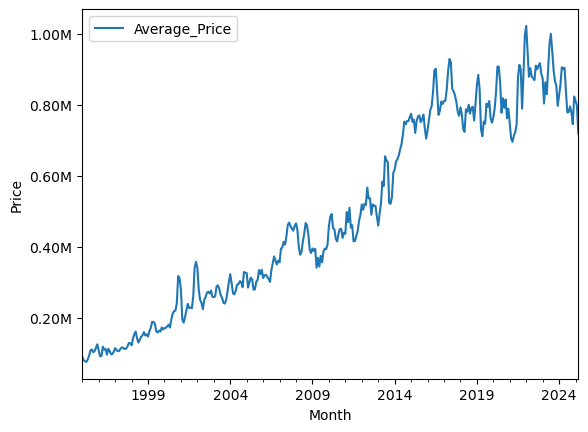

In [98]:
# import StrMethodFormatter from matplotlib.ticker to show the prices in millions 'M'

from matplotlib.ticker import FuncFormatter

# create a variable called ax to plot City_of_London_prices agianst Month nad Average Price

ax = City_of_London_prices.plot(kind = 'line', x = 'Month', y = 'Average_Price')

# Format y-axis to million "M" format using .yaxis.set_major_formatter() 

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.2f}M'))

# set y label to string 'Price'

ax.set_ylabel('Price')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [99]:
# adding a new column 'Year' by extracting the year fromm 'Month' column using lambda function
df['Year'] = df['Month'].apply(lambda t: t.year)

In [100]:
# check the Dataframe

df.head()

,London_Borough,ID,Month,Average_Price,Year
0,City of London,E09000001,1995-01-01,90347.0,1995
1,Barking & Dagenham,E09000002,1995-01-01,51870.0,1995
2,Barnet,E09000003,1995-01-01,98948.0,1995
3,Bexley,E09000004,1995-01-01,64956.0,1995
4,Brent,E09000005,1995-01-01,76880.0,1995


In [101]:
df.tail()

,London_Borough,ID,Month,Average_Price,Year
17404,Sutton,E09000029,2025-03-01,436424.0,2025
17405,Tower Hamlets,E09000030,2025-03-01,497367.0,2025
17406,Waltham Forest,E09000031,2025-03-01,522282.0,2025
17407,Wandsworth,E09000032,2025-03-01,704342.0,2025
17408,Westminster,E09000033,2025-03-01,904356.0,2025


In [104]:
# calculate mean house price for each year by grouping London_Borough and Year column
# Call the new Dataframe dfg

dfg = df.groupby(['London_Borough','Year']).mean()

/var/folders/f3/hdbg9f_j0cn761_jtcpg4pkr0000gn/T/ipykernel_27126/1369689156.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg = df.groupby(['London_Borough','Year']).mean()


In [105]:
# check dfg by randomly selecting rows, applying .sample()

dfg.sample(10)

,,Average_Price
London_Borough,Year,
Waltham Forest,1997,7.044950e+04
Brent,2021,5.287748e+05
Bexley,2006,1.918257e+05
Greenwich,2007,2.416619e+05
Westminster,2016,1.058347e+06
Kingston upon Thames,1997,1.051763e+05
Tower Hamlets,2019,4.815118e+05
Havering,2016,3.467299e+05
Enfield,1998,9.880783e+04


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [106]:
# checking the index of dfg

dfg.index

MultiIndex([('Barking & Dagenham', 1995),
            ('Barking & Dagenham', 1996),
            ('Barking & Dagenham', 1997),
            ('Barking & Dagenham', 1998),
            ('Barking & Dagenham', 1999),
            ('Barking & Dagenham', 2000),
            ('Barking & Dagenham', 2001),
            ('Barking & Dagenham', 2002),
            ('Barking & Dagenham', 2003),
            ('Barking & Dagenham', 2004),
            ...
            (       'Westminster', 2016),
            (       'Westminster', 2017),
            (       'Westminster', 2018),
            (       'Westminster', 2019),
            (       'Westminster', 2020),
            (       'Westminster', 2021),
            (       'Westminster', 2022),
            (       'Westminster', 2023),
            (       'Westminster', 2024),
            (       'Westminster', 2025)],
           names=['London_Borough', 'Year'], length=1023)

In [110]:
# resetting the index to numeric

dfg = dfg.reset_index()


In [111]:
# checking the structure of dataframe dfg
dfg.head()

,level_0,index,London_Borough,Year,Average_Price
0,0,0,Barking & Dagenham,1995,53265.416667
1,1,1,Barking & Dagenham,1996,53162.666667
2,2,2,Barking & Dagenham,1997,57537.583333
3,3,3,Barking & Dagenham,1998,61969.666667
4,4,4,Barking & Dagenham,1999,67145.333333


In [124]:
# Creating a function , create_price_ratio,  to calculate average price ratio between year 1998 and 2018

def create_price_ratio (d):
    
    y1998 = float(d['Average_Price'][d['Year']==1998])
    y2018 = float(d['Average_Price'][d['Year']==2018])
    ratio = [round ((y1998/y2018), 3)]
    return ratio

In [125]:
# checking the function 
create_price_ratio(dfg[dfg['London_Borough']=='Barking & Dagenham'])

[0.204]

In [126]:
# Now we want to get the Average peice ratio for all the London_Boroughs
# create an epmty dictionary, final, to store ratio of all the unique London Boroughs

final = {}

# Declare a for loop to iterate through 'London_Borough' column 
# Call the iterator variable 'b'

for b in dfg['London_Borough'].unique():
    
    # create a parameter to 'create_price_ratio': i.e. subset dfg on 'London_Borugh'==b.
    
    borough = dfg[dfg['London_Borough']==b]
    
    # calling the 'create_price_ratio' function with argument 'borough'
    # the result will be a new entry in the final dictionary
    
    final[b] = create_price_ratio(borough)
    
print(final)    

{'Barking & Dagenham': [0.204], 'Barnet': [0.229], 'Bexley': [0.235], 'Brent': [0.204], 'Bromley': [0.244], 'Camden': [0.203], 'City of London': [0.189], 'Croydon': [0.238], 'Ealing': [0.232], 'Enfield': [0.235], 'Greenwich': [0.21], 'Hackney': [0.161], 'Hammersmith & Fulham': [0.242], 'Haringey': [0.195], 'Harrow': [0.246], 'Havering': [0.231], 'Hillingdon': [0.238], 'Hounslow': [0.251], 'Islington': [0.207], 'Kensington & Chelsea': [0.197], 'Kingston upon Thames': [0.234], 'Lambeth': [0.202], 'Lewisham': [0.184], 'Merton': [0.211], 'Newham': [0.188], 'Redbridge': [0.224], 'Richmond upon Thames': [0.25], 'Southwark': [0.181], 'Sutton': [0.243], 'Tower Hamlets': [0.216], 'Waltham Forest': [0.171], 'Wandsworth': [0.21], 'Westminster': [0.187]}


In [128]:
# creating a dataframe 'df_ratios' from 'final' dictionary

df_ratios = pd.DataFrame(final)

# call the head() method df_ratios

df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.204,0.229,0.235,0.204,0.244,0.203,0.189,0.238,0.232,0.235,...,0.211,0.188,0.224,0.25,0.181,0.243,0.216,0.171,0.21,0.187


In [132]:
# we need to tranpose  the dataframe and call it df_ratios_T

df_ratios_T = df_ratios.transpose()

# reset the index

df_ratios_T = df_ratios_T.reset_index()

# calling .head()

df_ratios_T.head()


,index,0
0,Barking & Dagenham,0.204
1,Barnet,0.229
2,Bexley,0.235
3,Brent,0.204
4,Bromley,0.244


In [133]:
# rename the columns

df_ratios_T.rename(columns={'index': 'Borough', 0 : '2018'}, inplace=True)
df_ratiosb_T.head()

,Borough,2018
0,Barking & Dagenham,0.204
1,Barnet,0.229
2,Bexley,0.235
3,Brent,0.204
4,Bromley,0.244


In [148]:
# sort and select top 15 boroughs in ascebding order
# the smaller the ratio, the greater the price change

top_15 = df_ratios_T.sort_values(by='2018', ascending = True).head(15)
print(top_15)

                 Borough   2018
11               Hackney  0.161
30        Waltham Forest  0.171
27             Southwark  0.181
22              Lewisham  0.184
32           Westminster  0.187
24                Newham  0.188
6         City of London  0.189
13              Haringey  0.195
19  Kensington & Chelsea  0.197
21               Lambeth  0.202
5                 Camden  0.203
0     Barking & Dagenham  0.204
3                  Brent  0.204
18             Islington  0.207
31            Wandsworth  0.210


In [150]:
# ratios of all boroughs

all_borough =df_ratios_T.sort_values(by='2018', ascending = True)
print(all_borough)

                 Borough   2018
11               Hackney  0.161
30        Waltham Forest  0.171
27             Southwark  0.181
22              Lewisham  0.184
32           Westminster  0.187
24                Newham  0.188
6         City of London  0.189
13              Haringey  0.195
19  Kensington & Chelsea  0.197
21               Lambeth  0.202
5                 Camden  0.203
0     Barking & Dagenham  0.204
3                  Brent  0.204
18             Islington  0.207
31            Wandsworth  0.210
10             Greenwich  0.210
23                Merton  0.211
29         Tower Hamlets  0.216
25             Redbridge  0.224
1                 Barnet  0.229
15              Havering  0.231
8                 Ealing  0.232
20  Kingston upon Thames  0.234
9                Enfield  0.235
2                 Bexley  0.235
16            Hillingdon  0.238
7                Croydon  0.238
12  Hammersmith & Fulham  0.242
28                Sutton  0.243
4                Bromley  0.244
14      

In [179]:
# converting dfg dataframe to pivot table to plot line chart to see the trend.
dfg_pivot = dfg_pivot=dfg.pivot(index='Year', values='Average_Price', columns='London_Borough')
dfg_pivot.head()


London_Borough,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Year,,,,,,,,,,,,,,,,,,,,,
1995,53265.416667,97365.083333,64289.750000,78737.416667,83382.916667,119215.083333,97891.416667,69879.750000,86895.000000,76454.666667,...,86053.666667,57020.333333,71293.333333,116573.750000,74171.083333,71061.583333,69873.333333,63274.416667,101916.500000,142123.083333
1996,53162.666667,99707.000000,65488.666667,81116.083333,84990.333333,132529.500000,104378.500000,70681.416667,89217.916667,78661.416667,...,89793.333333,58245.750000,74022.250000,124440.333333,80931.916667,72437.166667,76945.250000,64201.000000,105864.250000,147969.416667
1997,57537.583333,113371.833333,70787.583333,93529.000000,95852.000000,148705.500000,115702.500000,78752.166667,104641.250000,88802.000000,...,102300.666667,63704.500000,81893.416667,144964.916667,92022.416667,81982.833333,94141.166667,70449.500000,124035.916667,175884.666667
1998,61969.666667,129787.750000,80629.833333,108562.333333,110156.583333,169054.916667,146248.666667,89366.250000,119124.750000,98807.833333,...,115503.166667,70704.500000,92838.333333,172864.000000,105503.083333,93096.000000,105937.000000,78016.750000,143883.166667,202551.666667
1999,67145.333333,144261.083333,86775.333333,120923.166667,122961.666667,189261.250000,169236.666667,98521.750000,135103.833333,108320.583333,...,130310.250000,77865.916667,101114.833333,192824.333333,127274.583333,101975.416667,124082.666667,86549.833333,166752.750000,227545.583333


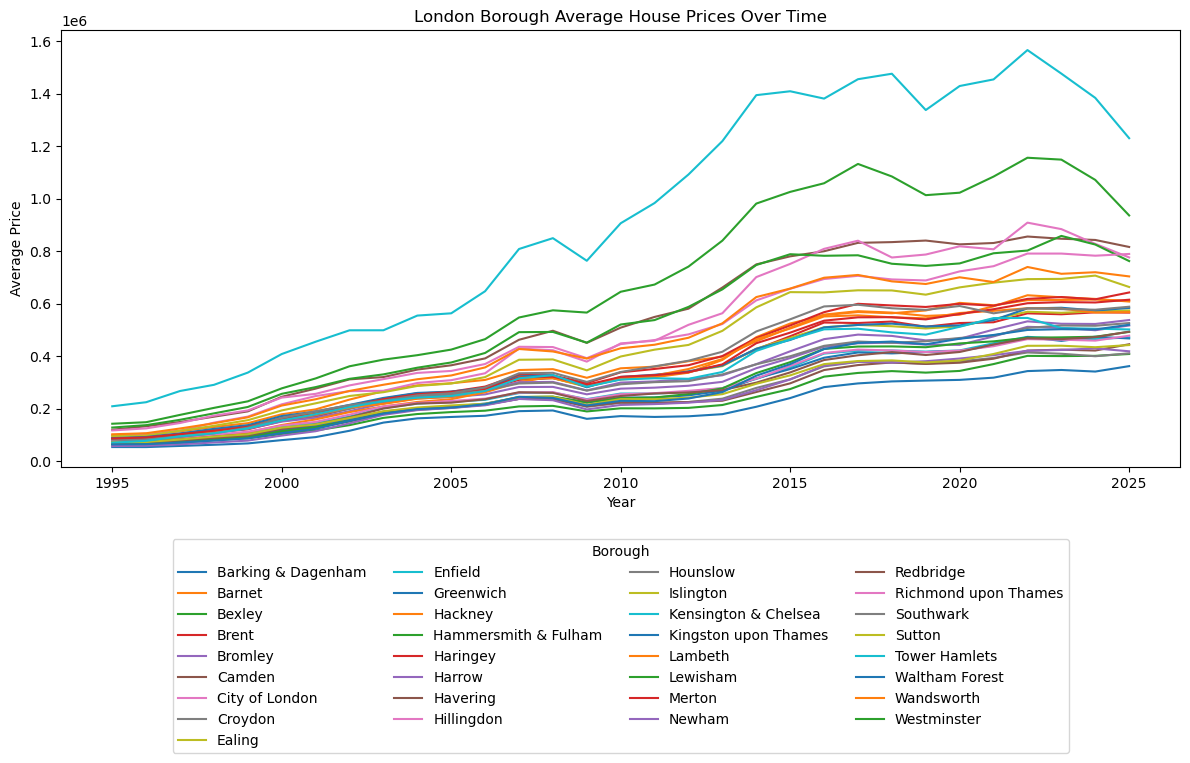

In [180]:
# ploting dfg_pivot 

ax = dfg_pivot.plot(kind='line', figsize=(12, 8))

# Customize legend to be below the plot
plt.legend(
    title="Borough", 
    bbox_to_anchor=(0.5, -0.15), 
    loc='upper center', 
    ncol=4  # Adjust ncol to fit your number of boroughs
)

plt.title("London Borough Average House Prices Over Time")
plt.ylabel("Average Price")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth'),
 Text(10, 0, 'Camden'),
 Text(11, 0, 'Barking & Dagenham'),
 Text(12, 0, 'Brent'),
 Text(13, 0, 'Islington'),
 Text(14, 0, 'Wandsworth'),
 Text(15, 0, 'Greenwich'),
 Text(16, 0, 'Merton'),
 Text(17, 0, 'Tower Hamlets'),
 Text(18, 0, 'Redbridge'),
 Text(19, 0, 'Barnet'),
 Text(20, 0, 'Havering'),
 Text(21, 0, 'Ealing'),
 Text(22, 0, 'Kingston upon Thames'),
 Text(23, 0, 'Enfield'),
 Text(24, 0, 'Bexley'),
 Text(25, 0, 'Hillingdon'),
 Text(26, 0, 'Croydon'),
 Text(27, 0, 'Hammersmith & Fulham'),
 Text(28, 0, 'Sutton'),
 Text(29, 0, 'Bromley'),
 Text(30, 0, 'Harrow'),
 Text(31, 0, 'Richmond upon Thames'),
 Text(32, 0, 'Hounslow')]

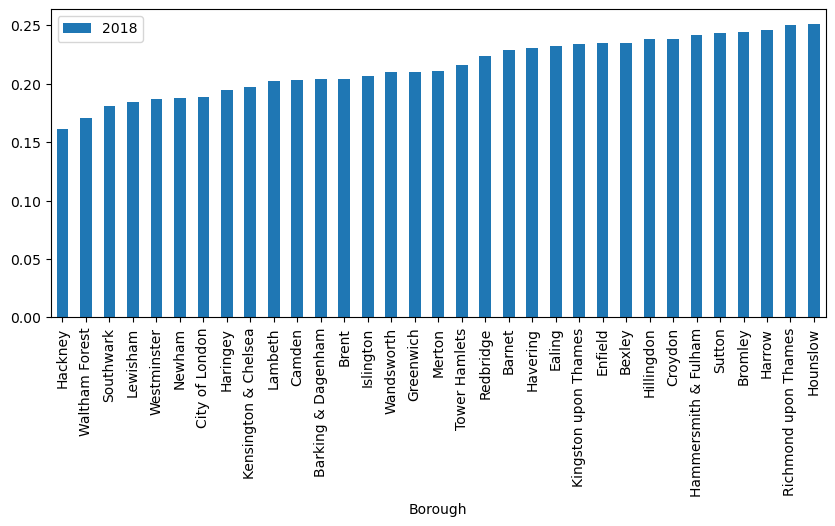

In [170]:
# plotting  a barchart of the boroughs that have seen the gratest price change in 2 decades.

ax = all_borough.plot(kind='bar', x ='Borough', figsize = (10,4))
ax.set_xticklabels(all_borough.Borough)

In [154]:
# subsetting the dfg dataframe to compare the price of Hackney and Hounslow from 1998 to 2018

hackney_hounslow =dfg[(dfg['London_Borough'].isin(['Hackney','Hounslow']))&(dfg['Year'].isin([1998,2018]))]
print(hackney_hounslow)

     level_0  index London_Borough  Year  Average_Price
344      344    344        Hackney  1998   90849.416667
364      364    364        Hackney  2018  563115.000000
530      530    530       Hounslow  1998  113291.916667
550      550    550       Hounslow  2018  450570.666667


In [156]:
# mean ratio of house price changes in 'London Boroughs'.

Mean_ratio = all_borough['2018'].mean()
print(Mean_ratio)

0.2149090909090909


In [163]:
# plotting dfg dataframe to caompare price change from 1998 to 2018.
# first we need to subset dfg to year 1998 and 2018 using isin() method

price_1998_2018= dfg[dfg['Year'].isin([1998,2018])]
print(price_1998_2018.head())                      
                      

    level_0  index      London_Borough  Year  Average_Price
3         3      3  Barking & Dagenham  1998   61969.666667
23       23     23  Barking & Dagenham  2018  303429.500000
34       34     34              Barnet  1998  129787.750000
54       54     54              Barnet  2018  565586.666667
65       65     65              Bexley  1998   80629.833333


In [165]:
# now we need to convert 'price_1998_2018' to a pivot table in order plot to grouped barchart

price_1998_2018_pivot = price_1998_2018.pivot(index='London_Borough', columns='Year', values='Average_Price')
print(price_1998_2018_pivot.head())

Year                         1998           2018
London_Borough                                  
Barking & Dagenham   61969.666667  303429.500000
Barnet              129787.750000  565586.666667
Bexley               80629.833333  342663.166667
Brent               108562.333333  531462.416667
Bromley             110156.583333  451074.083333


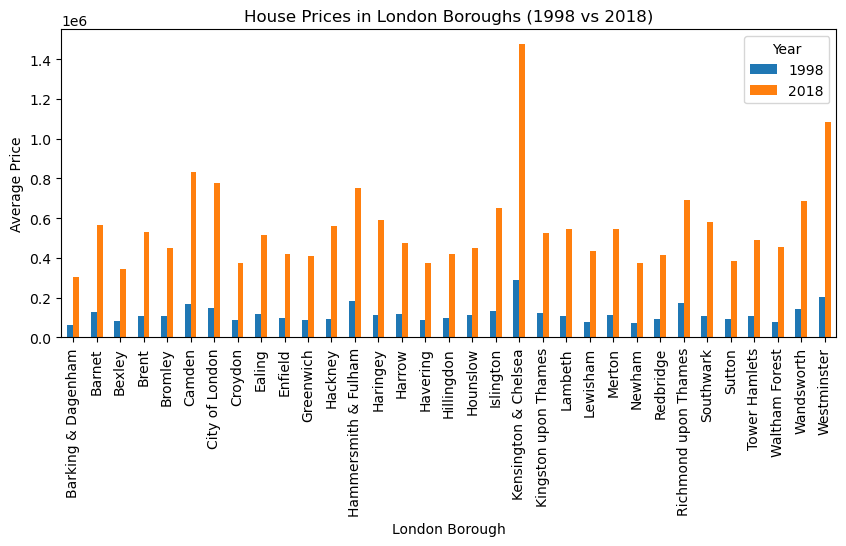

In [169]:
# plotting the grouped bar chart 

price_1998_2018_pivot.plot(kind='bar', figsize=(10,4))
plt.title('House Prices in London Boroughs (1998 vs 2018)')
plt.ylabel('Average Price')
plt.xlabel('London Borough')
plt.legend(title='Year')
plt.xticks(rotation = 90)
plt.show()

In [176]:
# checking out the top 5 most expensive borough in 2018
dfg_sorted = dfg.sort_values(by='Average_Price', ascending = False)

top_5_expensive_borough=dfg_sorted[dfg_sorted['Year']==2018].head(5)
print(top_5_expensive_borough)

      level_0  index        London_Borough  Year  Average_Price
612       612    612  Kensington & Chelsea  2018   1.475628e+06
1015     1015   1015           Westminster  2018   1.084205e+06
178       178    178                Camden  2018   8.341242e+05
209       209    209        City of London  2018   7.755018e+05
395       395    395  Hammersmith & Fulham  2018   7.516420e+05


In [177]:
# checking out the top 5 least expensive borough in 2018
top_5_least_expensive_borough=dfg_sorted[dfg_sorted['Year']==2018].tail(5)
print(top_5_least_expensive_borough)

     level_0  index      London_Borough  Year  Average_Price
488      488    488            Havering  2018  375640.000000
240      240    240             Croydon  2018  375426.750000
767      767    767              Newham  2018  375275.416667
85        85     85              Bexley  2018  342663.166667
23        23     23  Barking & Dagenham  2018  303429.500000


### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

## Findings

**From this exploratory data analysis of house prices across London boroughs, we observe that Hackney experienced the most significant increase, with prices rising more than 6-fold over two decades (ratio = 0.161). In contrast, Hounslow saw a 4-fold increase in the same period (ratio = 0.251). On average, house prices across all London boroughs increased by approximately 4.67 times, corresponding to a mean ratio of 0.214.**

**In 2018, the five most expensive London boroughs were Kensington & Chelsea, Westminster, Camden, City of London, and Hammersmith & Fulham, with average house prices ranging from £750,000 to £1.5 million. In contrast, the five least expensive boroughs were Havering, Croydon, Newham, Bexley, and Barking & Dagenham, where average prices ranged between £300,000 and £375,000.**